In [1]:
import pandas as pd
import altair as alt
import warnings
warnings.filterwarnings('ignore')
import sys

sys.path.append("..")
from scripts.data_utils import get_initial_dataset

In [2]:
merged_df = get_initial_dataset('private_materials/datajam_data/initial_cleaned_dataset.csv')

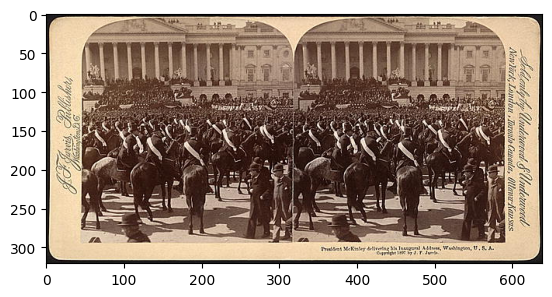

In [6]:
import shears

# extract the image content
result = shears.clip('private_materials/sample-data/data/00650985_03327r.jpg',
                      filter_min_size=900,
                      filter_threshold=0.8,
                      filter_connectivity=1)

# show the extracted image
shears.plot_image(result)

# save the extracted image
shears.save_image(result, 'result.jpg')

In [3]:
unique_vals = merged_df.apply(pd.Series.nunique).reset_index().rename(columns={'index':'column_name', 0:'unique_values'})
unique_vals['total_percent'] = unique_vals['unique_values'] / len(merged_df) * 100


In [4]:
unique_vals['category'] = pd.qcut(unique_vals['total_percent'], 3, labels=["too few", "just right", "too many"])

In [9]:
chart = alt.Chart(unique_vals[unique_vals.total_percent < 10]).mark_bar().encode(
    y=alt.Y('column_name', sort='-x'),
    x='total_percent',
    color='category'
).properties(
    title='Unique Values per Column'
)
chart

alt.Chart(...)

In [8]:
chart.save('process_notes/total_unique_values.png', scale_factor=2.0)

In [10]:
merged_df.location.value_counts()

['italy']                                                 1295
['japan']                                                 1160
['washington d.c.']                                        939
['saint louis', 'missouri']                                844
['switzerland']                                            817
                                                          ... 
['paso robles', 'california']                                1
['fort collins', 'colorado']                                 1
['california', 'san bernardino mountains']                   1
['nevada', 'california', 'lake', 'watershed', 'tahoe']       1
['europe']                                                   1
Name: location, Length: 2087, dtype: int64

In [9]:
merged_df[0:1].to_dict()

{'access_restricted': {0: False},
 'aka': {0: "['http://www.loc.gov/item/2015651359/', 'http://www.loc.gov/pictures/item/2015651359/', 'http://www.loc.gov/pictures/collection/stereo/item/2015651359/', 'http://hdl.loc.gov/loc.pnp/stereo.1s04563', 'http://hdl.loc.gov/loc.pnp/stereo.2s04563', 'http://www.loc.gov/resource/stereo.1s04563/', 'http://www.loc.gov/resource/stereo.2s04563/', 'http://lccn.loc.gov/2015651359']"},
 'campaigns': {0: '[]'},
 'contributor': {0: "['osborn & durbec']"},
 'coordinates': {0: "['32.88856,-80.00751']"},
 'date': {0: '1860'},
 'description': {0: "['1 photograph : print on card mount ; mount 17 x 8 cm (stereograph format) | Photograph shows a street view of Institute Hall, known as Secession Hall, flanked on the left by the Circular Church and on the right by the Teetotal restaurant.']"},
 'digitized': {0: True},
 'extract_timestamp': {0: '2021-09-01T20:42:24.201Z'},
 'group': {0: "['stereo', 'catalog', 'stereograph-cards', 'main-catalog']"},
 'hassegments': 

In [18]:
cols = merged_df.columns
date_cols = [col for col in cols if 'date' in col]

In [10]:
metadata_df[date_cols]

,date,item.created_published_date,item.date,item.sort_date,dates
0,1860,[ca. 1860],[ca. 1860],1860.0,NaN
1,1920,c1920.,c1920.,1920.0,['1920-01-01T00:00:00Z']
2,1902,c1902 Mar 15.,c1902 Mar 15.,1902.0,['1902-01-01T00:00:00Z']
3,1904,[1904],[1904],1904.0,"['1904-01-01T00:00:00Z', '1903-01-01T00:00:00Z']"
4,1902,c1902.,c1902.,1902.0,NaN
...,...,...,...,...,...
39521,1912,[1912],[1912],1912.0,['1912-01-01T00:00:00Z']
39522,1912,[1912],[1912],1912.0,['1912-01-01T00:00:00Z']
39523,1923,"[photographed between 1899 and 1901, published...","[photographed between 1899 and 1901, published...",1923.0,NaN
39524,1904,"[1904], c1905.","[1904], c1905.",1904.0,NaN


In [11]:
metadata_df[metadata_df.id.str.contains('2020634531')]

,Unnamed: 0,access_restricted,aka,campaigns,contributor,coordinates,date,description,digitized,extract_timestamp,...,item.number_former_id,item.stmt_of_responsibility,item.contributor_names,item.part_of,item.source_collection,location_city,location_country,location_state,location_county,split_id
22097,22097,False,['https://www.loc.gov/pictures/item/2020634531...,[],['keystone view company'],NaN,1904,['1 photograph : print ; mount 9 x 18 cm (ster...,True,2021-09-01T20:44:20.711Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020634531


In [12]:
metadata_df[0:1].to_dict()

{'Unnamed: 0': {0: 0},
 'access_restricted': {0: False},
 'aka': {0: "['http://www.loc.gov/item/2015651359/', 'http://www.loc.gov/pictures/item/2015651359/', 'http://www.loc.gov/pictures/collection/stereo/item/2015651359/', 'http://hdl.loc.gov/loc.pnp/stereo.1s04563', 'http://hdl.loc.gov/loc.pnp/stereo.2s04563', 'http://www.loc.gov/resource/stereo.1s04563/', 'http://www.loc.gov/resource/stereo.2s04563/', 'http://lccn.loc.gov/2015651359']"},
 'campaigns': {0: '[]'},
 'contributor': {0: "['osborn & durbec']"},
 'coordinates': {0: "['32.88856,-80.00751']"},
 'date': {0: '1860'},
 'description': {0: "['1 photograph : print on card mount ; mount 17 x 8 cm (stereograph format) | Photograph shows a street view of Institute Hall, known as Secession Hall, flanked on the left by the Circular Church and on the right by the Teetotal restaurant.']"},
 'digitized': {0: True},
 'extract_timestamp': {0: '2021-09-01T20:42:24.201Z'},
 'group': {0: "['stereo', 'catalog', 'stereograph-cards', 'main-catalo